# Numerical evaluation of the Bloch-Grueneisen resistivity

$$\rho(T) = \rho_0 \left(\frac{T}{\Theta_D}\right)^5 F\left(\frac{\Theta_D}{T}\right)$$

$$F(x)=\int_0^{x}{\frac{t^5 dt}{(e^t-1)(1-e^{-t})}}$$

A low temperature the upper integration limit can be replaced by infinity and then

$$F(\infty) \approx 120 \zeta(5) = 124.431330617$$

where $\zeta(x)$ is the Riemann zeta function. See [Deutsch 1987](https://dx.doi.org/10.1088/0305-4470/20/13/001). 

Thus, at low temperatures

$$ \rho(T) = 120 \zeta(5) \rho_0 \left(\frac{T}{\Theta_D}\right)^5 $$
	
This approximation introduces an absolute error in $F$ of less than $10^{-13}$ when $T/\Theta_D < 1/30$.

At high temperatures the integrand can be expanded for small values of $t$

$$\frac{t^5 dt}{(e^t-1)(1-e^{-t})} \approx t^3 - \frac{t^5}{12} + \...$$

and the integration yields

$$F(x) \approx \frac{x^4}{4} + O(x^6)$$

and 

$$\rho(T) = \frac{\rho_0}{4} \frac{T}{\Theta_D}$$

In [32]:
function y = bloch_integral(x)
  ifunc = @(x) x.^5.*exp(-x)./(1-exp(-x)).^2;
  y=zeros(size(x));
  for i=1:length(x)
    y(i) = quad(ifunc,0,x(i));
  end
end

function y=bloch_resistivity(x)

  y=zeros(size(x));
  % low T, abs error < 10^-13
  i = find(x<=0.03333);
  y(i) = x(i).^5*124.431330617; % 124.431330617 = 120*zeta(5)
  % high T, abs error < 10^-11
  i = find(x>=20); 
  y(i)=x(i)/4-(1/72-(1/1920)./x(i).^2)./x(i);
  % intermediate T
  i = find(x>0.03333 & x<20);
  y(i) = x(i).^5.*bloch_integral(1./x(i));

end


In [21]:
% Test high T
x=[1e-6 1e-3 1]';
y=bloch_integral(x);
y1 = x.^4/4;
[y y1 (y1-y)./y]

ans =

   2.5000e-25   2.5000e-25  -1.1625e-11
   2.5000e-13   2.5000e-13   5.5556e-08
   2.3662e-01   2.5000e-01   5.6565e-02



In [25]:
% Test low T
x=[1 10 100 1e3]';
y=bloch_integral(x);
y1 = ones(size(y))*124.431330617;
[y y1 (y1-y)./y]

ans =

   2.3662e-01   1.2443e+02   5.2488e+02
   1.1638e+02   1.2443e+02   6.9175e-02
   1.2443e+02   1.2443e+02  -1.6440e-12
   1.2443e+02   1.2443e+02  -1.6426e-12



In [33]:
bloch_resistivity(2)

ans = 0.4931


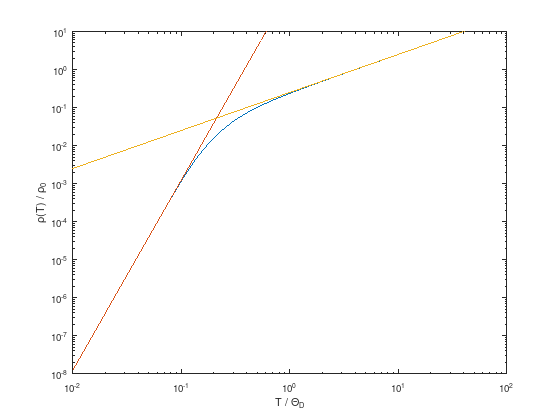

In [42]:
x=logspace(-2,2,61);
y = bloch_resistivity(x);
y1 = x.^5*124.431330617;
y2 = x/4;
loglog(x,y,x,y1,x,y2)
ylabel('\rho(T) / \rho_0')
xlabel('T / \Theta_D')
ylim([1e-8 10])

## Other notes

[Cvijovic 2011](https://doi.org/10.1007%2Fs11232-011-0003-4) THE BLOCH–GRUNEISEN FUNCTION OF ARBITRARY ORDER AND ITS SERIES REPRESENTATIONS

$$F_s(x)=\int_0^{x}{\frac{t^s dt}{(e^t-1)(1-e^{-t})}} = \int_0^{x}{\frac{t^s e^t dt}{(e^t-1)^2}}$$

$$F_s(x) = \frac{x^s}{1-e^x} + s\, \int_0^x{\frac{t^{s-1} dt}{(e^t-1)}} = \frac{x^s}{1-e^x} + s\Gamma(s) z_s(x)$$

GSL Debye Function https://www.gnu.org/software/gsl/doc/html/specfunc.html#c.gsl_sf_debye_1

$$D_n(x)=\frac{n}{x^n}\int_0^x{\frac{t^{n} dt}{(e^t-1)}}$$